In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set_style('darkgrid')

import time
import os

In [66]:
dataset_cols = pd.read_csv('NBAPredictionsData.csv') # Data as of 26th Jan 2021
print("Columns: ") # Read the columns from the data
print(dataset_cols.columns) 

Columns: 
Index(['Current rating', 'Team', 'Conference', 'Full-strength rating',
       'Proj. Record', 'Proj. Point Diff/G',
       'Chance of Making PlayoffsMake play-offs', 'Full-strength rating.1',
       'Chance of Making FinalsMake Finals',
       'Chance of Winning FinalsWin Finals'],
      dtype='object')


In [61]:
print("Total Rows and Columns that is the shape of the data: ", dataset_cols.shape) # Shape of the data
print("\nData Info: ") # Data info
print(dataset_cols.info())

Total Rows and Columns that is the shape of the data:  (30, 10)

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Current rating                           30 non-null     int64  
 1   Team                                     30 non-null     object 
 2   Conference                               30 non-null     object 
 3   Full-strength rating                     30 non-null     int64  
 4   Proj. Record                             30 non-null     object 
 5   Proj. Point Diff/G                       30 non-null     float64
 6   Chance of Making PlayoffsMake play-offs  30 non-null     object 
 7   Full-strength rating.1                   30 non-null     int64  
 8   Chance of Making FinalsMake Finals       30 non-null     object 
 9   Chance of Winning FinalsWin Finals       30 n

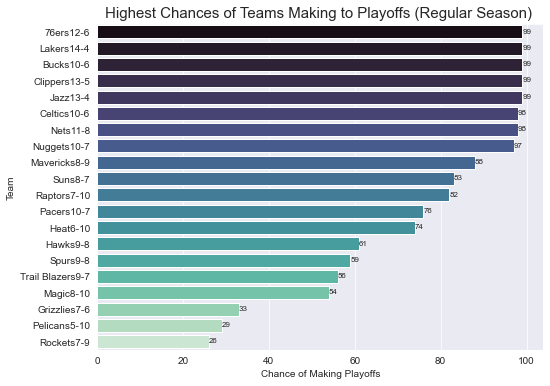

In [68]:
# Convert the column, Chance of Making PlayoffsMake play-offs, from Object datatype to int datatype for the purpose of plotting graphs
df["Chance of Making PlayoffsMake play-offs"] = df["Chance of Making PlayoffsMake play-offs"].apply(str).str.replace('%', '')  # Remove the % sign
df["Chance of Making PlayoffsMake play-offs"] = df["Chance of Making PlayoffsMake play-offs"].apply(str).str.replace('>', '')  # Remove the > sign
df["Chance of Making PlayoffsMake play-offs"] = df["Chance of Making PlayoffsMake play-offs"].apply(str).str.replace('<', '')  # Remove the < sign
df['Chance of Making PlayoffsMake play-offs'] = df['Chance of Making PlayoffsMake play-offs'].astype(int) # Convert the column from Object datatype into int datatype

# Plot showing the highest chance of teams making to playoffs 
highest_chances_playoffs = df.groupby(by='Team')['Chance of Making PlayoffsMake play-offs'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(8,6))
plt.xlabel('Chance of Making PlayoffsMake play-offs',fontsize=10)
plt.ylabel('Team',fontsize=10)
plt.title('Highest Chances of Teams Making to Playoffs (Regular Season) ',fontsize = 15)
ax = sns.barplot(x= highest_chances_playoffs['Chance of Making PlayoffsMake play-offs'],y = highest_chances_playoffs['Team'], palette='mako')
for i ,(value,name) in enumerate (zip(highest_chances_playoffs['Chance of Making PlayoffsMake play-offs'], highest_chances_playoffs['Team'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 8,ha='left',va='center')
ax.set(xlabel='Chance of Making Playoffs',ylabel='Team')
plt.show()

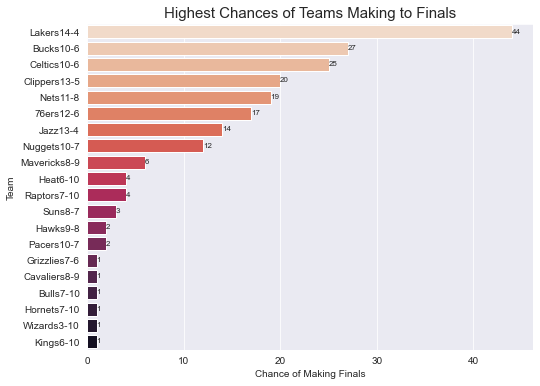

In [69]:
# Convert the column, Chance of Making FinalsMake Finals, from Object datatype to int datatype for the purpose of plotting graphs
df["Chance of Making FinalsMake Finals"] = df["Chance of Making FinalsMake Finals"].apply(str).str.replace('%', '')  # Remove the % sign
df["Chance of Making FinalsMake Finals"] = df["Chance of Making FinalsMake Finals"].apply(str).str.replace('>', '')  # Remove the > sign
df["Chance of Making FinalsMake Finals"] = df["Chance of Making FinalsMake Finals"].apply(str).str.replace('<', '')  # Remove the < sign
df['Chance of Making FinalsMake Finals'] = df['Chance of Making FinalsMake Finals'].astype(int) # Convert the column into int datatype

# Plot showing the highest chances of teams making to finals
highest_chances_finals = df.groupby(by='Team')['Chance of Making FinalsMake Finals'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(8,6))
plt.title('Highest Chances of Teams Making to Finals',fontsize = 15)
ax = sns.barplot(x= highest_chances_finals['Chance of Making FinalsMake Finals'],y = highest_chances_finals['Team'], palette='rocket_r')
for i ,(value,name) in enumerate (zip(highest_chances_finals['Chance of Making FinalsMake Finals'], highest_chances_finals['Team'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 8,ha='left',va='center')
ax.set(xlabel='Chance of Making Finals',ylabel='Team')
plt.show()

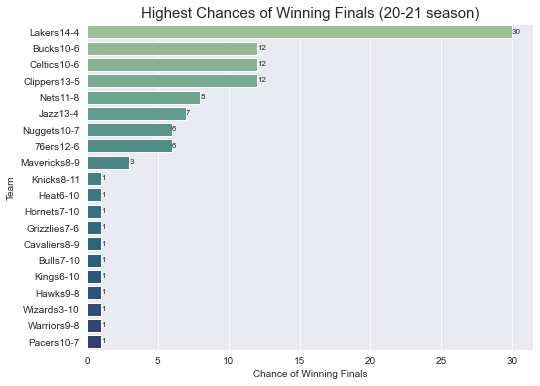

In [70]:
# Convert the column, Chance of Winning FinalsWin Finals, from Object datatype to int datatype for the purpose of plotting graphs
df["Chance of Winning FinalsWin Finals"] = df["Chance of Winning FinalsWin Finals"].apply(str).str.replace('%', '')  # Remove the % sign
df["Chance of Winning FinalsWin Finals"] = df["Chance of Winning FinalsWin Finals"].apply(str).str.replace('>', '')  # Remove the > sign
df["Chance of Winning FinalsWin Finals"] = df["Chance of Winning FinalsWin Finals"].apply(str).str.replace('<', '')  # Remove the < sign
df['Chance of Winning FinalsWin Finals'] = df['Chance of Winning FinalsWin Finals'].astype(int) # Convert the column into int datatype

# Plot showing the highest chances of teams actually winning the finals 20-21 season
win_chances_finals = df.groupby(by='Team')['Chance of Winning FinalsWin Finals'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(8,6))
plt.title('Highest Chances of Winning Finals (20-21 season)',fontsize = 15)
ax = sns.barplot(x= win_chances_finals['Chance of Winning FinalsWin Finals'],y = win_chances_finals['Team'], palette='crest')
for i ,(value,name) in enumerate (zip(win_chances_finals['Chance of Winning FinalsWin Finals'], win_chances_finals['Team'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 8,ha='left',va='center')
ax.set(xlabel='Chance of Winning Finals',ylabel='Team')
plt.show()